In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

In [2]:
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('final_scout_not_dummy.csv')

In [4]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [5]:
df.shape

(15915, 23)

In [6]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [9]:
df.describe(include='all')

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
count,15915,15915,15915.000000,15915,15915.000000,15915,15915,15915.000000,15915,15915,15915,15915,15915.000000,15915.000000,15915.000000,15915.000000,15915,15915,15915,15915.000000,15915.000000,15915,15915.000000
unique,9,8,NaN,2,NaN,5,4,NaN,6196,346,659,4442,NaN,NaN,NaN,NaN,3,2,3,NaN,NaN,3,NaN
top,Audi A3,Sedans,NaN,VAT deductible,NaN,Used,Benzine,NaN,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",NaN,NaN,NaN,NaN,Metallic,Cloth,Manual,NaN,NaN,front,NaN
freq,3097,8004,NaN,15044,NaN,11095,8548,NaN,388,1737,5785,729,NaN,NaN,NaN,NaN,15246,12234,8149,NaN,NaN,15707,NaN
mean,NaN,NaN,18024.380584,NaN,32089.995708,NaN,NaN,5.937355,NaN,NaN,NaN,NaN,1.389695,1.042853,88.499340,0.247063,NaN,NaN,NaN,1428.661891,1337.700534,NaN,4.832124
std,NaN,NaN,7381.679318,NaN,36977.214964,NaN,NaN,0.704772,NaN,NaN,NaN,NaN,1.121306,0.339178,26.674341,0.431317,NaN,NaN,NaN,275.804272,199.682385,NaN,0.867530
min,NaN,NaN,4950.000000,NaN,0.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,0.000000,NaN,NaN,NaN,890.000000,840.000000,NaN,3.000000
25%,NaN,NaN,12850.000000,NaN,1920.500000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,66.000000,0.000000,NaN,NaN,NaN,1229.000000,1165.000000,NaN,4.100000
50%,NaN,NaN,16900.000000,NaN,20413.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,85.000000,0.000000,NaN,NaN,NaN,1461.000000,1295.000000,NaN,4.800000
75%,NaN,NaN,21900.000000,NaN,46900.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,2.000000,1.000000,103.000000,0.000000,NaN,NaN,NaN,1598.000000,1472.000000,NaN,5.400000


In [10]:
[var for var in df.columns if df[var].isnull().any()]

[]

<AxesSubplot:>

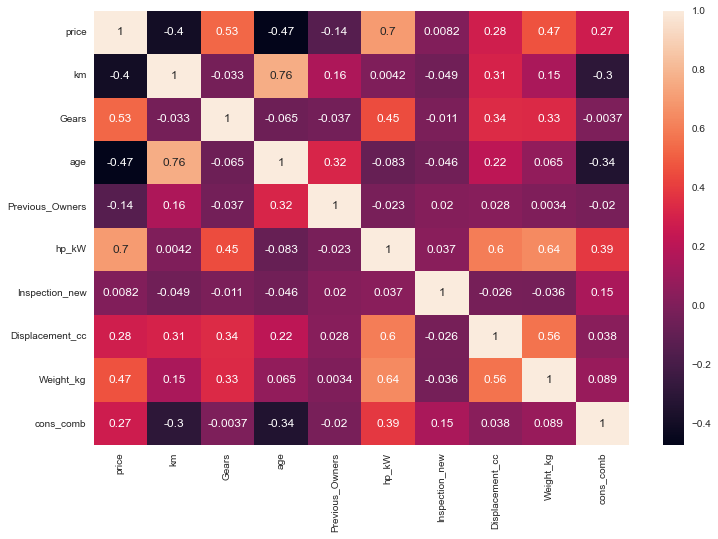

In [12]:
sns.heatmap(df.corr(), annot=True)

# Feature Engineering

In [18]:
df.select_dtypes('object').columns

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [13]:
for col in df.select_dtypes('object').columns:
    print(f"{col}\t:", df[col].nunique())

make_model	: 9
body_type	: 8
vat	: 2
Type	: 5
Fuel	: 4
Comfort_Convenience	: 6196
Entertainment_Media	: 346
Extras	: 659
Safety_Security	: 4442
Paint_Type	: 3
Upholstery_type	: 2
Gearing_Type	: 3
Drive_chain	: 3


In [14]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [17]:
for col in df.select_dtypes('object'):
    df[col] = df[col].str.lower()

In [20]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,audi a1,sedans,15770,vat deductible,56013.0,used,diesel,7.0,"air conditioning,armrest,automatic climate con...","bluetooth,hands-free equipment,on-board comput...","alloy wheels,catalytic converter,voice control","abs,central door lock,daytime running lights,d...",3.0,2.0,66.0,1,metallic,cloth,automatic,1422.0,1220.0,front,3.8
1,audi a1,sedans,14500,price negotiable,80000.0,used,benzine,7.0,"air conditioning,automatic climate control,hil...","bluetooth,hands-free equipment,on-board comput...","alloy wheels,sport seats,sport suspension,voic...","abs,central door lock,central door lock with r...",2.0,1.0,141.0,0,metallic,cloth,automatic,1798.0,1255.0,front,5.6
2,audi a1,sedans,14640,vat deductible,83450.0,used,diesel,7.0,"air conditioning,cruise control,electrical sid...","mp3,on-board computer","alloy wheels,voice control","abs,central door lock,daytime running lights,d...",3.0,1.0,85.0,0,metallic,cloth,automatic,1598.0,1135.0,front,3.8
3,audi a1,sedans,14500,vat deductible,73000.0,used,diesel,6.0,"air suspension,armrest,auxiliary heating,elect...","bluetooth,cd player,hands-free equipment,mp3,o...","alloy wheels,sport seats,voice control","abs,alarm system,central door lock with remote...",3.0,1.0,66.0,0,metallic,cloth,automatic,1422.0,1195.0,front,3.8
4,audi a1,sedans,16790,vat deductible,16200.0,used,diesel,7.0,"air conditioning,armrest,automatic climate con...","bluetooth,cd player,hands-free equipment,mp3,o...","alloy wheels,sport package,sport suspension,vo...","abs,central door lock,driver-side airbag,elect...",3.0,1.0,66.0,1,metallic,cloth,automatic,1422.0,1135.0,front,4.1


In [21]:
df.select_dtypes('object').columns

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

## `make_model` Column

In [22]:
df['make_model'].value_counts()

audi a3           3097
audi a1           2614
opel insignia     2598
opel astra        2525
opel corsa        2216
renault clio      1839
renault espace     991
renault duster      34
audi a2              1
Name: make_model, dtype: int64

In [25]:
df[df['make_model'] == 'audi a2'].index

Int64Index([2614], dtype='int64')

In [27]:
df.drop(df[df['make_model'] == 'audi a2'].index, inplace=True)

In [28]:
df['make_model'].value_counts()

audi a3           3097
audi a1           2614
opel insignia     2598
opel astra        2525
opel corsa        2216
renault clio      1839
renault espace     991
renault duster      34
Name: make_model, dtype: int64

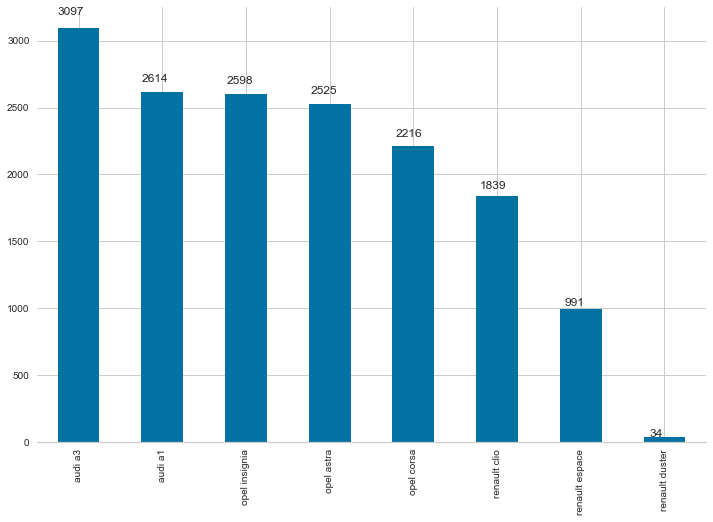

In [38]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.03))

## `body_type` Column

In [39]:
df['body_type'].value_counts()

sedans           8004
station wagon    3677
compact          3240
van               817
transporter        88
off-road           55
coupe              25
convertible         8
Name: body_type, dtype: int64

In [40]:
rare_categories = ['transporter', 'off-road', 'coupe', 'convertible']

In [42]:
df[df['body_type'].isin(rare_categories)]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
842,audi a1,coupe,13950,vat deductible,27300.0,used,benzine,5.0,"air conditioning,cruise control,electrically h...","bluetooth,cd player,hands-free equipment,on-bo...","alloy wheels,catalytic converter","abs,adaptive cruise control,central door lock,...",3.0,2.0,70.0,0,metallic,part/full leather,manual,999.0,1010.0,front,4.2
1203,audi a1,coupe,15900,vat deductible,50000.0,used,diesel,5.0,"air conditioning,air suspension,armrest,auxili...","cd player,hands-free equipment,mp3,on-board co...","alloy wheels,catalytic converter,sport seats,s...","abs,adaptive cruise control,adaptive headlight...",2.0,0.0,85.0,0,metallic,part/full leather,manual,1598.0,1010.0,front,4.2
2615,audi a3,convertible,10893,vat deductible,19800.0,used,benzine,7.0,"air conditioning,armrest,automatic climate con...","bluetooth,cd player,digital radio,hands-free e...","alloy wheels,shift paddles","abs,adaptive cruise control,blind spot monitor...",1.0,1.0,110.0,0,metallic,part/full leather,automatic,1498.0,1470.0,front,5.1
2695,audi a3,coupe,18000,price negotiable,23080.0,used,diesel,7.0,"air conditioning,air suspension,armrest,automa...","bluetooth,cd player,digital radio,hands-free e...","alloy wheels,sport suspension,voice control","abs,alarm system,central door lock,central doo...",3.0,1.0,81.0,0,metallic,cloth,automatic,1598.0,1280.0,front,3.8
2828,audi a3,coupe,16990,price negotiable,29718.0,used,diesel,7.0,"air conditioning,armrest,automatic climate con...","bluetooth,cd player,mp3,on-board computer,radi...",alloy wheels,"abs,alarm system,central door lock,daytime run...",3.0,1.0,81.0,0,metallic,cloth,automatic,1598.0,1250.0,front,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,renault espace,transporter,32700,vat deductible,10.0,used,diesel,6.0,"air conditioning,armrest,cruise control,electr...","bluetooth,digital radio,hands-free equipment,m...",alloy wheels,"abs,alarm system,central door lock,driver-side...",0.0,1.0,118.0,0,metallic,part/full leather,automatic,1997.0,1758.0,front,5.1
15591,renault espace,transporter,31000,vat deductible,31000.0,used,diesel,6.0,"air conditioning,air suspension,automatic clim...","bluetooth,digital radio,hands-free equipment,m...","alloy wheels,catalytic converter,shift paddles...","abs,adaptive cruise control,adaptive headlight...",1.0,1.0,118.0,0,metallic,part/full leather,automatic,1598.0,1734.0,front,4.7
15622,renault espace,off-road,29500,vat deductible,31686.0,used,diesel,6.0,"air conditioning,armrest,automatic climate con...","bluetooth,hands-free equipment,mp3,on-board co...","alloy wheels,touch screen","abs,adaptive cruise control,central door lock,...",2.0,1.0,118.0,0,metallic,part/full leather,automatic,1598.0,1734.0,front,4.7
15623,renault espace,transporter,29500,vat deductible,5500.0,used,diesel,6.0,"air conditioning,power windows",on-board computer,alloy wheels,"abs,alarm system,passenger-side airbag,power s...",1.0,1.0,118.0,0,metallic,part/full leather,automatic,1598.0,1734.0,front,4.7


In [43]:
df['body_type'].replace({'transporter': 'rare',
                        'off-road': 'rare',
                        'coupe': 'rare',
                        'convertible': 'rare'}, inplace=True)

In [44]:
df['body_type'].value_counts()

sedans           8004
station wagon    3677
compact          3240
van               817
rare              176
Name: body_type, dtype: int64

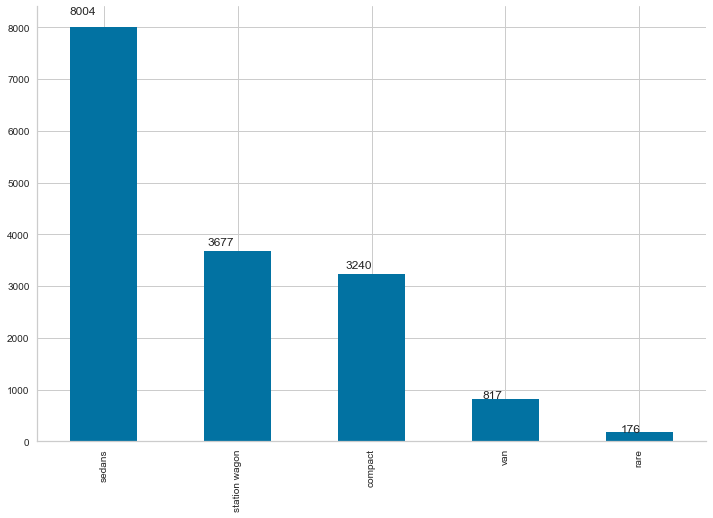

In [45]:
ax = df.body_type.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

## `vat` Column

In [46]:
df.select_dtypes('object').columns

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [51]:
df['vat'].value_counts()

vat deductible      15043
price negotiable      871
Name: vat, dtype: int64

<BarContainer object of 2 artists>

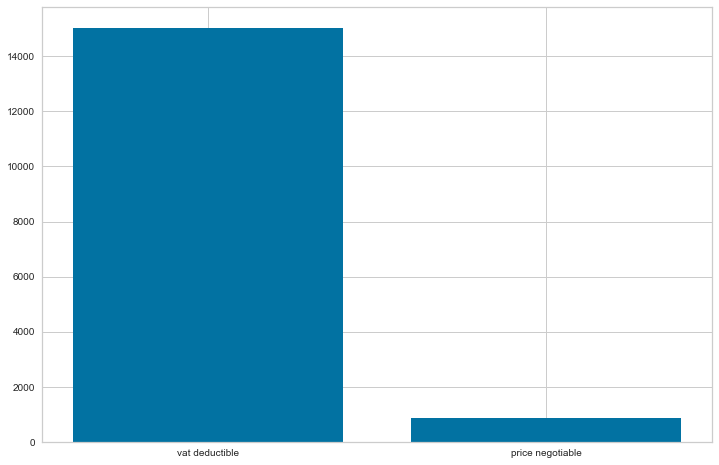

In [48]:
plt.bar(df['vat'].value_counts().index, df['vat'].value_counts().values)

## `Type` Column

In [52]:
df['Type'].value_counts()

used              11095
new                1649
pre-registered     1364
employee's car     1010
demonstration       796
Name: Type, dtype: int64

<BarContainer object of 5 artists>

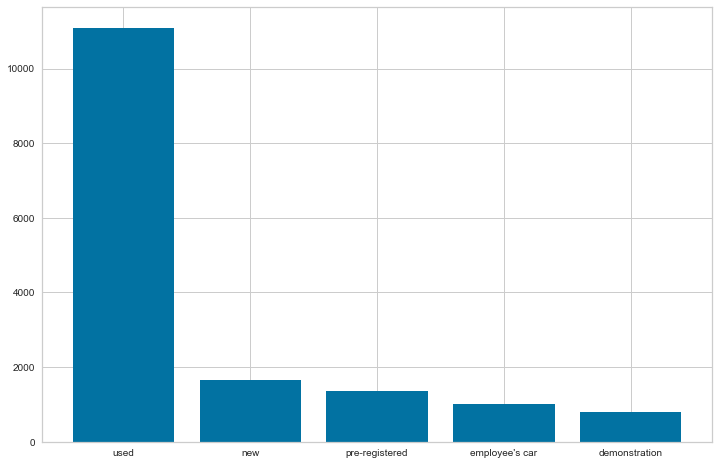

In [53]:
plt.bar(df['Type'].value_counts().index, df['Type'].value_counts().values)

## `Fuel` Column

In [54]:
df['Fuel'].value_counts()

benzine     8548
diesel      7297
lpg/cng       64
electric       5
Name: Fuel, dtype: int64

In [56]:
df[df['Fuel']=='electric'].index

Int64Index([3356, 3612, 3615, 3617, 13393], dtype='int64')

In [57]:
df.drop(df[df['Fuel']=='electric'].index, inplace=True)

In [58]:
df['Fuel'].value_counts()

benzine    8548
diesel     7297
lpg/cng      64
Name: Fuel, dtype: int64

In [59]:
df.select_dtypes('object').columns

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

## `Comfort_Convenience` Column

In [60]:
df['Comfort_Convenience'].value_counts()

air conditioning,electrical side mirrors,hill holder,power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   388
air conditioning,armrest,automatic climate control,cruise control,electrical side mirrors,leather steering wheel,light sensor,lumbar support,multi-function steering wheel,navigation system,park distance control,parking assist system sensors front,parking assist system sensors rear,power windows,rain sensor,seat heating,start-stop system                                                                                                                                                   187
air conditioning,armre

In [61]:
df['Comfort_Convenience'].nunique()

6193

In [62]:
df['Comfort_Convenience'].str.get_dummies(sep=',')

,air conditioning,air suspension,armrest,automatic climate control,auxiliary heating,cruise control,electric starter,electric tailgate,electrical side mirrors,electrically adjustable seats,electrically heated windshield,heads-up display,heated steering wheel,hill holder,keyless central door lock,leather seats,leather steering wheel,light sensor,lumbar support,massage seats,multi-function steering wheel,navigation system,panorama roof,park distance control,parking assist system camera,parking assist system self-steering,parking assist system sensors front,parking assist system sensors rear,power windows,rain sensor,seat heating,seat ventilation,split rear seats,start-stop system,sunroof,tinted windows,wind deflector,windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15911,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15912,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15913,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [63]:
df = pd.concat([df, df['Comfort_Convenience'].str.get_dummies(sep=',').add_prefix('cc_')], axis=1)

In [64]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield
0,audi a1,sedans,15770,vat deductible,56013.0,used,diesel,7.0,"air conditioning,armrest,automatic climate con...","bluetooth,hands-free equipment,on-board comput...","alloy wheels,catalytic converter,voice control","abs,central door lock,daytime running lights,d...",3.0,2.0,66.0,1,metallic,cloth,automatic,1422.0,1220.0,front,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,audi a1,sedans,14500,price negotiable,80000.0,used,benzine,7.0,"air conditioning,automatic climate control,hil...","bluetooth,hands-free equipment,on-board comput...","alloy wheels,sport seats,sport suspension,voic...","abs,central door lock,central door lock with r...",2.0,1.0,141.0,0,metallic,cloth,automatic,1798.0,1255.0,front,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,audi a1,sedans,14640,vat deductible,83450.0,used,diesel,7.0,"air conditioning,cruise control,electrical sid...","mp3,on-board computer","alloy wheels,voice control","abs,central door lock,daytime running lights,d...",3.0,1.0,85.0,0,metallic,cloth,automatic,1598.0,1135.0,front,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,audi a1,sedans,14500,vat deductible,73000.0,used,diesel,6.0,"air suspension,armrest,auxiliary heating,elect...","bluetooth,cd player,hands-free equipment,mp3,o...","alloy wheels,sport seats,voice control","abs,alarm system,central door lock with remote...",3.0,1.0,66.0,0,metallic,cloth,automatic,1422.0,1195.0,front,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,audi a1,sedans,16790,vat deductible,16200.0,used,diesel,7.0,"air conditioning,armrest,automatic climate con...","bluetooth,cd player,hands-free equipment,mp3,o...","alloy wheels,sport package,sport suspension,vo...","abs,central door lock,driver-side airbag,elect...",3.0,1.0,66.0,1,metallic,cloth,automatic,1422.0,1135.0,front,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0


In [65]:
df.shape

(15909, 61)

In [66]:
df.drop('Comfort_Convenience', axis=1, inplace=True)

In [67]:
df.shape

(15909, 60)

## `Entertainment_Media` Column

In [68]:
df['Entertainment_Media'].value_counts()

bluetooth,hands-free equipment,on-board computer,radio,usb                      1737
bluetooth,hands-free equipment,mp3,on-board computer,radio,usb                  1134
bluetooth,cd player,hands-free equipment,mp3,on-board computer,radio,usb        1008
on-board computer                                                                614
radio                                                                            558
                                                                                ... 
bluetooth,cd player,mp3                                                            1
cd player,usb                                                                      1
bluetooth,cd player,digital radio,radio,usb                                        1
bluetooth,cd player,digital radio,mp3,on-board computer,radio,television,usb       1
hands-free equipment,on-board computer,radio,sound system                          1
Name: Entertainment_Media, Length: 346, dtype: int64

In [71]:
df['Entertainment_Media'].nunique()

346

In [72]:
df['Entertainment_Media'].str.get_dummies(sep=',')

,bluetooth,cd player,digital radio,hands-free equipment,mp3,on-board computer,radio,sound system,television,usb
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15910,1,0,1,1,0,1,1,0,0,1
15911,1,0,1,1,0,0,1,0,0,1
15912,1,0,0,1,0,1,1,0,0,0
15913,1,0,1,0,0,0,1,0,0,1


In [73]:
df.shape

(15909, 60)

In [74]:
df = pd.concat([df, df['Entertainment_Media'].str.get_dummies(sep=',').add_prefix('em_')], axis=1)

In [75]:
df.shape

(15909, 70)

In [76]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb
0,audi a1,sedans,15770,vat deductible,56013.0,used,diesel,7.0,"bluetooth,hands-free equipment,on-board comput...","alloy wheels,catalytic converter,voice control","abs,central door lock,daytime running lights,d...",3.0,2.0,66.0,1,metallic,cloth,automatic,1422.0,1220.0,front,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0
1,audi a1,sedans,14500,price negotiable,80000.0,used,benzine,7.0,"bluetooth,hands-free equipment,on-board comput...","alloy wheels,sport seats,sport suspension,voic...","abs,central door lock,central door lock with r...",2.0,1.0,141.0,0,metallic,cloth,automatic,1798.0,1255.0,front,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0
2,audi a1,sedans,14640,vat deductible,83450.0,used,diesel,7.0,"mp3,on-board computer","alloy wheels,voice control","abs,central door lock,daytime running lights,d...",3.0,1.0,85.0,0,metallic,cloth,automatic,1598.0,1135.0,front,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,audi a1,sedans,14500,vat deductible,73000.0,used,diesel,6.0,"bluetooth,cd player,hands-free equipment,mp3,o...","alloy wheels,sport seats,voice control","abs,alarm system,central door lock with remote...",3.0,1.0,66.0,0,metallic,cloth,automatic,1422.0,1195.0,front,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1
4,audi a1,sedans,16790,vat deductible,16200.0,used,diesel,7.0,"bluetooth,cd player,hands-free equipment,mp3,o...","alloy wheels,sport package,sport suspension,vo...","abs,central door lock,driver-side airbag,elect...",3.0,1.0,66.0,1,metallic,cloth,automatic,1422.0,1135.0,front,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1


In [77]:
df.drop('Entertainment_Media', axis=1, inplace=True)

In [78]:
df.shape

(15909, 69)

## `Extras` Column 

In [79]:
df['Extras'].value_counts()

alloy wheels                                                                                               5782
alloy wheels,touch screen                                                                                   697
roof rack                                                                                                   595
alloy wheels,voice control                                                                                  582
alloy wheels,touch screen,voice control                                                                     544
                                                                                                           ... 
alloy wheels,catalytic converter,shift paddles,sport package,sport seats,sport suspension,voice control       1
alloy wheels,catalytic converter,roof rack,sport package,sport seats,trailer hitch                            1
alloy wheels,catalytic converter,ski bag,sport package,voice control                                    

In [80]:
df['Extras'].nunique()  

659

In [82]:
df['Extras'].str.get_dummies(sep=',')

,alloy wheels,cab or rented car,catalytic converter,handicapped enabled,right hand drive,roof rack,shift paddles,ski bag,sliding door,sport package,sport seats,sport suspension,touch screen,trailer hitch,tuned car,voice control,winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15911,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15912,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15913,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [83]:
df.shape

(15909, 69)

In [84]:
df = pd.concat([df, df['Extras'].str.get_dummies(sep=',').add_prefix('ex_')], axis=1)

In [85]:
df.shape

(15909, 86)

In [86]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres
0,audi a1,sedans,15770,vat deductible,56013.0,used,diesel,7.0,"alloy wheels,catalytic converter,voice control","abs,central door lock,daytime running lights,d...",3.0,2.0,66.0,1,metallic,cloth,automatic,1422.0,1220.0,front,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,audi a1,sedans,14500,price negotiable,80000.0,used,benzine,7.0,"alloy wheels,sport seats,sport suspension,voic...","abs,central door lock,central door lock with r...",2.0,1.0,141.0,0,metallic,cloth,automatic,1798.0,1255.0,front,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,audi a1,sedans,14640,vat deductible,83450.0,used,diesel,7.0,"alloy wheels,voice control","abs,central door lock,daytime running lights,d...",3.0,1.0,85.0,0,metallic,cloth,automatic,1598.0,1135.0,front,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,audi a1,sedans,14500,vat deductible,73000.0,used,diesel,6.0,"alloy wheels,sport seats,voice control","abs,alarm system,central door lock with remote...",3.0,1.0,66.0,0,metallic,cloth,automatic,1422.0,1195.0,front,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,audi a1,sedans,16790,vat deductible,16200.0,used,diesel,7.0,"alloy wheels,sport package,sport suspension,vo...","abs,central door lock,driver-side airbag,elect...",3.0,1.0,66.0,1,metallic,cloth,automatic,1422.0,1135.0,front,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0


In [87]:
df.drop('Extras', axis=1, inplace=True)

In [88]:
df.shape

(15909, 85)

In [89]:
df.select_dtypes('object').columns

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Safety_Security',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

## `Safety_Security` Column

In [90]:
df['Safety_Security'].value_counts()

abs,central door lock,daytime running lights,driver-side airbag,electronic stability control,fog lights,immobilizer,isofix,passenger-side airbag,power steering,side airbag,tire pressure monitoring system,traction control                                                                                                                                      729
abs,central door lock,daytime running lights,driver-side airbag,electronic stability control,immobilizer,isofix,passenger-side airbag,power steering,side airbag,tire pressure monitoring system,traction control                                                                                                                                                 480
abs,central door lock,daytime running lights,driver-side airbag,electronic stability control,fog lights,immobilizer,isofix,led daytime running lights,passenger-side airbag,power steering,side airbag,tire pressure monitoring system,traction control                                     

In [91]:
df['Safety_Security'].str.get_dummies(sep=',')

,abs,adaptive cruise control,adaptive headlights,alarm system,blind spot monitor,central door lock,central door lock with remote control,daytime running lights,driver drowsiness detection,driver-side airbag,electronic stability control,emergency brake assistant,emergency system,fog lights,head airbag,immobilizer,isofix,lane departure warning system,led daytime running lights,led headlights,night view assist,passenger-side airbag,power steering,rear airbag,side airbag,tire pressure monitoring system,traction control,traffic sign recognition,xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15911,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15912,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15913,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0,1,0


In [92]:
df.shape

(15909, 85)

In [93]:
df = pd.concat([df, df['Safety_Security'].str.get_dummies(sep=',').add_prefix('ss_')], axis=1)

In [94]:
df.shape

(15909, 114)

In [95]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_lane departure warning system,ss_led daytime running lights,ss_led headlights,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights
0,audi a1,sedans,15770,vat deductible,56013.0,used,diesel,7.0,"abs,central door lock,daytime running lights,d...",3.0,2.0,66.0,1,metallic,cloth,automatic,1422.0,1220.0,front,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,audi a1,sedans,14500,price negotiable,80000.0,used,benzine,7.0,"abs,central door lock,central door lock with r...",2.0,1.0,141.0,0,metallic,cloth,automatic,1798.0,1255.0,front,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,audi a1,sedans,14640,vat deductible,83450.0,used,diesel,7.0,"abs,central door lock,daytime running lights,d...",3.0,1.0,85.0,0,metallic,cloth,automatic,1598.0,1135.0,front,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,audi a1,sedans,14500,vat deductible,73000.0,used,diesel,6.0,"abs,alarm system,central door lock with remote...",3.0,1.0,66.0,0,metallic,cloth,automatic,1422.0,1195.0,front,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,audi a1,sedans,16790,vat deductible,16200.0,used,diesel,7.0,"abs,central door lock,driver-side airbag,elect...",3.0,1.0,66.0,1,metallic,cloth,automatic,1422.0,1135.0,front,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1


In [96]:
df.drop('Safety_Security', axis=1, inplace=True)

In [97]:
df.shape

(15909, 113)

In [98]:
df.select_dtypes('object').columns

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

## `Paint_Type` Column

In [99]:
df['Paint_Type'].value_counts()

metallic       15240
uni/basic        637
perl effect       32
Name: Paint_Type, dtype: int64

## `Upholstery_type` Column

In [100]:
df['Upholstery_type'].value_counts()

cloth                12231
part/full leather     3678
Name: Upholstery_type, dtype: int64

## `Gearing_Type` Column

In [101]:
df['Gearing_Type'].value_counts()

manual            8148
automatic         7296
semi-automatic     465
Name: Gearing_Type, dtype: int64

## `Drive_chain` Column

In [102]:
df['Drive_chain'].value_counts()

front    15701
4wd        204
rear         4
Name: Drive_chain, dtype: int64

In [104]:
df[df['Drive_chain'] == 'rear'].index

Int64Index([11027, 11452, 12085, 14607], dtype='int64')

In [105]:
df.shape

(15909, 113)

In [106]:
df.drop(df[df['Drive_chain'] == 'rear'].index, inplace=True)

In [107]:
df.shape

(15905, 113)

In [108]:
df.select_dtypes('object')

,make_model,body_type,vat,Type,Fuel,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,audi a1,sedans,vat deductible,used,diesel,metallic,cloth,automatic,front
1,audi a1,sedans,price negotiable,used,benzine,metallic,cloth,automatic,front
2,audi a1,sedans,vat deductible,used,diesel,metallic,cloth,automatic,front
3,audi a1,sedans,vat deductible,used,diesel,metallic,cloth,automatic,front
4,audi a1,sedans,vat deductible,used,diesel,metallic,cloth,automatic,front
...,...,...,...,...,...,...,...,...,...
15910,renault espace,van,vat deductible,new,diesel,metallic,part/full leather,automatic,front
15911,renault espace,van,vat deductible,used,benzine,metallic,cloth,automatic,front
15912,renault espace,van,vat deductible,pre-registered,diesel,metallic,part/full leather,automatic,front
15913,renault espace,van,vat deductible,pre-registered,diesel,metallic,part/full leather,automatic,front


In [109]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_lane departure warning system,ss_led daytime running lights,ss_led headlights,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights
0,audi a1,sedans,15770,vat deductible,56013.0,used,diesel,7.0,3.0,2.0,66.0,1,metallic,cloth,automatic,1422.0,1220.0,front,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,audi a1,sedans,14500,price negotiable,80000.0,used,benzine,7.0,2.0,1.0,141.0,0,metallic,cloth,automatic,1798.0,1255.0,front,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,audi a1,sedans,14640,vat deductible,83450.0,used,diesel,7.0,3.0,1.0,85.0,0,metallic,cloth,automatic,1598.0,1135.0,front,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,audi a1,sedans,14500,vat deductible,73000.0,used,diesel,6.0,3.0,1.0,66.0,0,metallic,cloth,automatic,1422.0,1195.0,front,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,audi a1,sedans,16790,vat deductible,16200.0,used,diesel,7.0,3.0,1.0,66.0,1,metallic,cloth,automatic,1422.0,1135.0,front,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1


In [110]:
df.shape

(15905, 113)

# Getting Final Dummies

In [112]:
df = pd.get_dummies(df, drop_first=True)

In [113]:
df.shape

(15905, 128)

In [115]:
df.select_dtypes('object').columns

Index([], dtype='object')

# Train Test Split

In [116]:
X = df.drop('price', axis=1)
y = df['price']

In [117]:
X.shape

(15905, 127)

In [118]:
y.shape

(15905,)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [120]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11133, 127), (4772, 127), (11133,), (4772,))

# Linear Regression

In [123]:
lm = LinearRegression(n_jobs=-1)

In [124]:
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [125]:
lm.score(X_train, y_train)

0.892754256904162

In [126]:
lm.score(X_test, y_test)

0.8823637400991662

In [127]:
y_pred = lm.predict(X_test)

In [128]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [129]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8823637400991662
MAE 		: 1727.5846241018528
MSE 		: 6154258.243205159
RMSE 		: 2480.7777496594003


In [130]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [131]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.064803,0.004088,0.884933,-1765.040556,-6.243733e+06,-2498.746306
1,0.050780,0.002924,0.885673,-1705.999234,-5.623923e+06,-2371.481218
2,0.041334,0.004537,0.882408,-1709.030577,-6.342144e+06,-2518.361300
3,0.047947,0.002999,0.887812,-1799.857074,-7.548600e+06,-2747.471548
4,0.035298,0.002727,0.887774,-1701.856567,-6.098502e+06,-2469.514542
5,0.035766,0.002576,0.898870,-1675.401943,-5.397217e+06,-2323.191139
6,0.037735,0.002639,0.894930,-1676.459852,-5.486610e+06,-2342.351390
7,0.036221,0.003427,0.887588,-1826.366343,-7.207777e+06,-2684.730334
8,0.035190,0.002523,0.897088,-1676.084361,-5.285180e+06,-2298.951828
9,0.037910,0.002930,0.879341,-1738.295325,-6.294800e+06,-2508.943992


In [132]:
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### Prediction Error

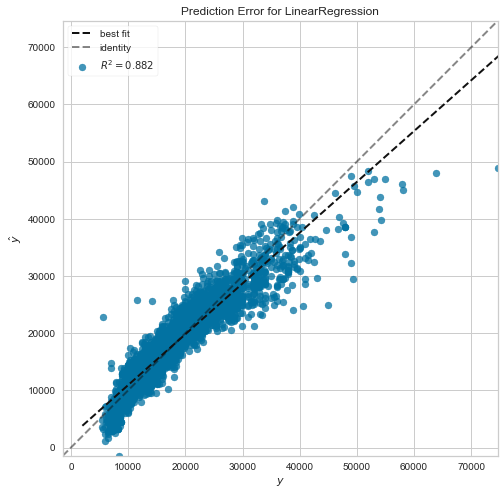

In [133]:
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

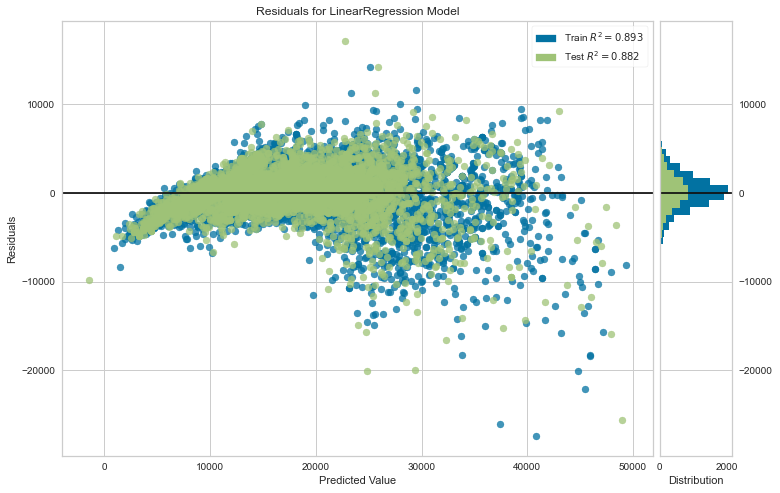

In [134]:
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [135]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [138]:
compare.head(15)

,Actual,Pred,Residual
227,16530,18551.871685,-2021.871685
8865,7879,7727.307703,151.692297
2787,17600,18290.884262,-690.884262
13035,23561,22792.957774,768.042226
8028,16390,17548.247826,-1158.247826
7791,21845,24392.696311,-2547.696311
7720,25990,23969.986562,2020.013438
13103,15900,16608.116090,-708.116090
624,12788,12639.287994,148.712006
10678,14980,15647.384415,-667.384415


/opt/miniconda3/envs/machinelearning/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

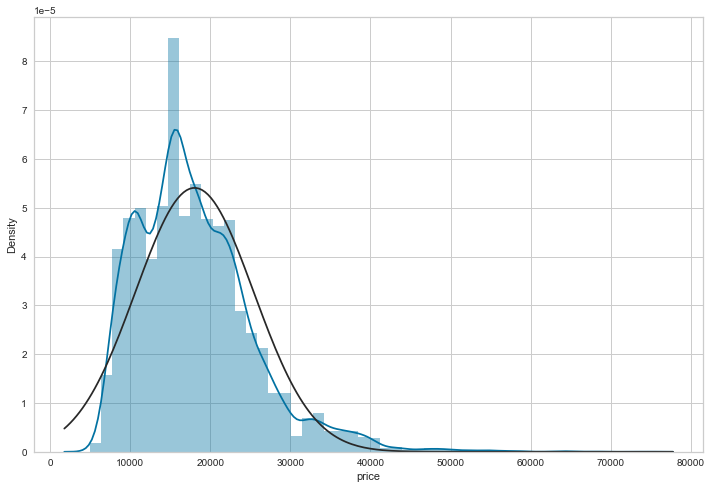

In [142]:
sns.distplot(y, fit=stats.norm)

# Ridge Regression

### Scaling

In [143]:
scaler = MinMaxScaler()

In [145]:
scaler.fit(X_train)

MinMaxScaler()

In [146]:
X_train = scaler.transform(X_train)

In [147]:
X_test = scaler.transform(X_test)

In [148]:
ridge_model = Ridge()

In [149]:
ridge_model.fit(X_train, y_train)

Ridge()

In [150]:
ridge_model.score(X_train, y_train)

0.8926905700349952

In [151]:
ridge_model.score(X_test, y_test)

0.8825850930153651

In [152]:
y_pred = ridge_model.predict(X_test)

In [153]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8825850930153651
MAE 		: 1723.8520391093195
MSE 		: 6142677.944661809
RMSE 		: 2478.4426450216292


### Hyperparameter tuning

In [154]:
alpha_space = np.linspace(0.01, 10, 100)

In [155]:
alpha_space

array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.13818182,  3.23909091,  3.34      ,  3.44090909,
        3.54181818,  3.64272727,  3.74363636,  3.84454545,  3.94545455,
        4.04636364,  4.14727273,  4.24818182,  4.34909091,  4.45      ,
        4.55090909,  4.65181818,  4.75272727,  4.85363636,  4.95454545,
        5.05545455,  5.15636364,  5.25727273,  5.35818182,  5.45909091,
        5.56      ,  5.66090909,  5.76181818,  5.86272727,  5.96363636,
        6.06454545,  6.16545455,  6.26636364,  6.36727273,  6.46818182,
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97

In [156]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv=10, scoring='neg_root_mean_squared_error')

In [157]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [158]:
ridge_cv_model.alpha_

0.31272727272727274

In [159]:
ridge_cv_model.score(X_train, y_train)

0.8927474035007893

In [160]:
ridge_cv_model.score(X_test, y_test)

0.8824542899099479

In [161]:
y_pred = ridge_cv_model.predict(X_test)

In [162]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8824542899099479
MAE 		: 1726.2888221263674
MSE 		: 6149521.039558138
RMSE 		: 2479.8227839017322


In [163]:
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Lasso Regression

In [164]:
lasso_model = Lasso()

In [165]:
lasso_model.fit(X_train, y_train)

Lasso()

In [166]:
lasso_model.score(X_train, y_train)

0.8925582903645706

In [167]:
lasso_model.score(X_test, y_test)

0.8828271017788025

In [168]:
y_pred = lasso_model.predict(X_test)

In [169]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8828271017788025
MAE 		: 1723.1137518749301
MSE 		: 6130017.014872236
RMSE 		: 2475.8871167466896


### Hyperparameter tuning

In [170]:
lasso_cv_model = LassoCV(alphas = alpha_space,  cv = 10, max_iter = 100000, n_jobs =-1)

In [171]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10, ma

In [172]:
lasso_cv_model.alpha_

0.31272727272727274

In [173]:
lasso_cv_model.score(X_train, y_train)

0.8927307852910502

In [174]:
lasso_cv_model.score(X_test, y_test)

0.8826002344841619

In [175]:
y_pred = lasso_cv_model.predict(X_test)

In [176]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8826002344841619
MAE 		: 1725.7137926392627
MSE 		: 6141885.8036226835
RMSE 		: 2478.2828336617845


In [177]:
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Elastic-Net

In [178]:
elastic_model = ElasticNet()

In [179]:
elastic_model.fit(X_train, y_train)

ElasticNet()

In [180]:
elastic_model.score(X_train, y_train)

0.6101389838749709

In [181]:
elastic_model.score(X_test, y_test)

0.6013974851645884

### Hyperparameter tuning

In [182]:
elastic_model = ElasticNet()

In [183]:
param_grid = {'alpha':alpha_space,
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

In [184]:
grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [185]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.6...
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scorin

In [186]:
grid_model.best_estimator_

ElasticNet(alpha=0.31272727272727274, l1_ratio=1)

In [187]:
grid_model.score(X_train, y_train)

-2436.292489151295

In [188]:
grid_model.score(X_test, y_test)

-2478.2828336617845

In [189]:
y_pred = grid_model.predict(X_test)

In [190]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8826002344841619
MAE 		: 1725.7137926392627
MSE 		: 6141885.8036226835
RMSE 		: 2478.2828336617845


In [191]:
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Feature Importances

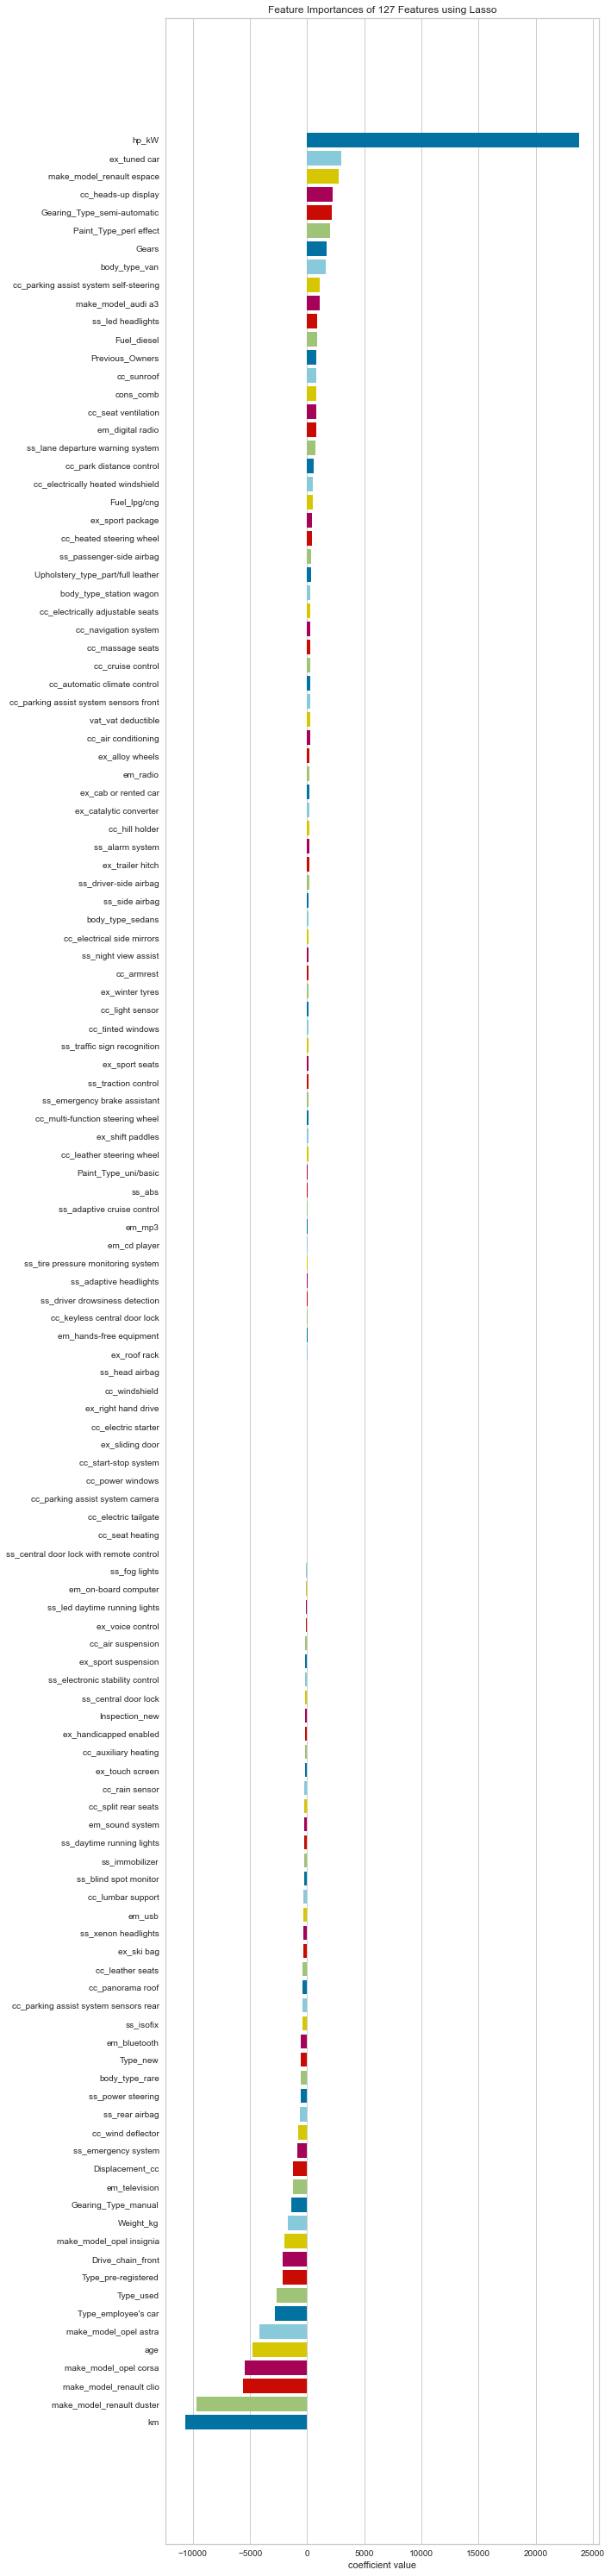

In [192]:
viz = FeatureImportances(Lasso(alpha=0.313), labels=X.columns, relative = False)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

# Modelling with fewer features

In [193]:
df_new = pd.read_csv("final_scout_not_dummy.csv")

In [195]:
df_new.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [196]:
df_new = df_new[["make_model", "hp_kW", "km","age", "price", "Gearing_Type"]]

In [197]:
df_new.head()

,make_model,hp_kW,km,age,price,Gearing_Type
0,Audi A1,66.0,56013.0,3.0,15770,Automatic
1,Audi A1,141.0,80000.0,2.0,14500,Automatic
2,Audi A1,85.0,83450.0,3.0,14640,Automatic
3,Audi A1,66.0,73000.0,3.0,14500,Automatic
4,Audi A1,66.0,16200.0,3.0,16790,Automatic


In [198]:
df_new[df_new["make_model"] == "Audi A2"]

,make_model,hp_kW,km,age,price,Gearing_Type
2614,Audi A2,85.0,26166.0,1.0,28200,Manual


In [199]:
df_new.drop(2614, inplace=True)

In [200]:
df_new = pd.get_dummies(df_new, drop_first = True)

In [201]:
df_new.head()

,hp_kW,km,age,price,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.0,56013.0,3.0,15770,0,0,0,0,0,0,0,0,0
1,141.0,80000.0,2.0,14500,0,0,0,0,0,0,0,0,0
2,85.0,83450.0,3.0,14640,0,0,0,0,0,0,0,0,0
3,66.0,73000.0,3.0,14500,0,0,0,0,0,0,0,0,0
4,66.0,16200.0,3.0,16790,0,0,0,0,0,0,0,0,0


In [202]:
X = df_new.drop(columns=["price"])
y = df_new.price

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [204]:
scaler = MinMaxScaler()

In [205]:
scaler.fit(X_train)

MinMaxScaler()

In [206]:
X_train = scaler.transform(X_train)

In [207]:
X_test = scaler.transform(X_test)

In [208]:
lasso_final_model = LassoCV(alphas=alpha_space, max_iter=100000, cv=10)

In [209]:
lasso_final_model.fit(X_train, y_train)

LassoCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=10, ma

In [213]:
alpha_space

array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.13818182,  3.23909091,  3.34      ,  3.44090909,
        3.54181818,  3.64272727,  3.74363636,  3.84454545,  3.94545455,
        4.04636364,  4.14727273,  4.24818182,  4.34909091,  4.45      ,
        4.55090909,  4.65181818,  4.75272727,  4.85363636,  4.95454545,
        5.05545455,  5.15636364,  5.25727273,  5.35818182,  5.45909091,
        5.56      ,  5.66090909,  5.76181818,  5.86272727,  5.96363636,
        6.06454545,  6.16545455,  6.26636364,  6.36727273,  6.46818182,
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97

In [212]:
lasso_final_model.alpha_

0.01

In [210]:
lasso_final_model.score(X_train, y_train)

0.8485512631061306

In [211]:
lasso_final_model.score(X_test, y_test)

0.8472106789935583

In [214]:
y_pred = lasso_final_model.predict(X_test)

In [215]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8472106789935583
MAE 		: 1968.991198669622
MSE 		: 7892802.827366653
RMSE 		: 2809.4132532197277


In [216]:
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Visually Compare Scores

In [217]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}

In [218]:
scores = pd.DataFrame(scores).T

In [219]:
scores

,r2_score,mae,rmse
linear_m,0.882364,1727.584624,2480.777750
ridge_m,0.882454,1726.288822,2479.822784
lasso_m,0.882600,1725.713793,2478.282834
elastic_m,0.882600,1725.713793,2478.282834
final_m,0.847211,1968.991199,2809.413253


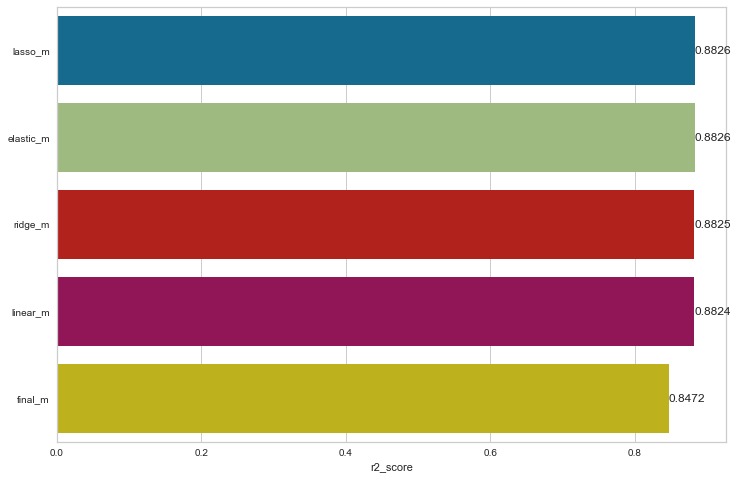

In [220]:
compare = scores.sort_values(by="r2_score", ascending=False)
ax = sns.barplot(x=compare["r2_score"] , y=compare.index)
for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.4f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')

In [221]:
X_train.shape

(11139, 12)

# Train on entire dataset

In [222]:
columns_name = X.columns

In [223]:
final_scaler = MinMaxScaler()

In [224]:
final_scaler.fit(X)

MinMaxScaler()

In [225]:
X = final_scaler.transform(X)

In [226]:
lasso_final_model = Lasso(alpha=0.01)

In [227]:
lasso_final_model.fit(X, y)

Lasso(alpha=0.01)

In [234]:
my_dict = {
    "hp_kW": 81,
    "age": 1,
    "km": 100000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [235]:
my_dict = pd.DataFrame([my_dict])

In [236]:
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,81,1,100000,Audi A3,Automatic


In [237]:
columns_name

Index(['hp_kW', 'km', 'age', 'make_model_Audi A3', 'make_model_Opel Astra',
       'make_model_Opel Corsa', 'make_model_Opel Insignia',
       'make_model_Renault Clio', 'make_model_Renault Duster',
       'make_model_Renault Espace', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic'],
      dtype='object')

In [239]:
my_dict = pd.get_dummies(my_dict).reindex(columns=columns_name, fill_value=0)

In [240]:
my_dict

,hp_kW,km,age,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,81,100000,1,1,0,0,0,0,0,0,0,0


In [241]:
my_dict = final_scaler.transform(my_dict)

In [242]:
lasso_final_model.predict(my_dict)

array([19881.49008906])